In [84]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
    player = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [ ]:
#Is there a statistical difference in the number of average goals scored per match between different leagues?
#Is there a statistical difference in the average players rating per match between different leagues?
#Is there a statistical difference in the number of scoreless matches between different leagues per season?

In [87]:
Player_Attributes.loc[Player_Attributes['overall_rating'] > 90]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
6531,6532,1088,30723,2007-08-30 00:00:00,91.0,92.0,right,medium,high,42.0,...,76.0,92.0,93.0,95.0,87.0,7.0,21.0,34.0,21.0,21.0
6532,6533,1088,30723,2007-02-22 00:00:00,91.0,92.0,right,medium,high,42.0,...,76.0,92.0,93.0,95.0,87.0,7.0,6.0,34.0,12.0,12.0
12788,12789,41,30955,2012-02-22 00:00:00,91.0,93.0,right,high,medium,85.0,...,93.0,65.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
12789,12790,41,30955,2011-08-30 00:00:00,91.0,93.0,right,high,medium,85.0,...,93.0,65.0,57.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
33330,33331,20801,30893,2015-10-16 00:00:00,93.0,93.0,right,high,low,82.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
33331,33332,20801,30893,2015-09-25 00:00:00,93.0,93.0,right,high,low,82.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
33332,33333,20801,30893,2015-09-21 00:00:00,93.0,93.0,right,high,low,82.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
33333,33334,20801,30893,2015-05-15 00:00:00,92.0,92.0,right,high,low,83.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
33334,33335,20801,30893,2015-04-17 00:00:00,92.0,92.0,right,high,low,83.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
33335,33336,20801,30893,2014-10-31 00:00:00,92.0,92.0,right,high,low,83.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


In [99]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [102]:
teams.loc[teams['team_api_id']==6532]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name


In [91]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [27]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [35]:
matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [305]:
matches_df = matches[['id', 'country_id', 'league_id', 'season', 'match_api_id', 
                      'home_team_api_id', 'home_team_goal', 'away_team_goal', 'B365H', 'B365D' ,'B365A']]
matches_df.head()

,id,country_id,league_id,season,match_api_id,home_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1,1,1,2008/2009,492473,9987,1,1,1.73,3.40,5.00
1,2,1,1,2008/2009,492474,10000,0,0,1.95,3.20,3.60
2,3,1,1,2008/2009,492475,9984,0,3,2.38,3.30,2.75
3,4,1,1,2008/2009,492476,9991,5,0,1.44,3.75,7.50
4,5,1,1,2008/2009,492477,7947,1,3,5.00,3.50,1.65


In [30]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [21]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [49]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", con)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [52]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", con)
leages_by_season



,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [58]:
df.loc[:,'England'] = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])
df.loc[:,'England']

2008/2009    2.700000
2009/2010    2.565789
2010/2011    2.768421
2011/2012    2.797368
2012/2013    2.805263
2013/2014    2.797368
2014/2015    2.771053
2015/2016    2.478947
Name: England, dtype: float64

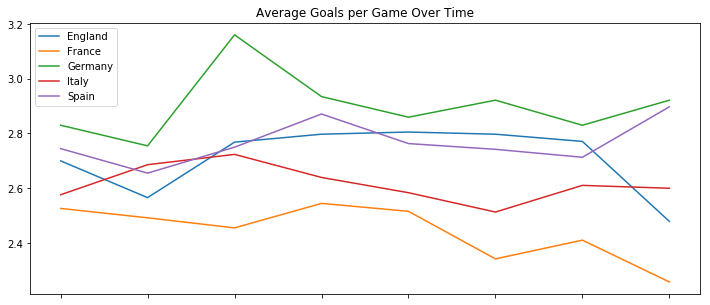

In [76]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')


In [70]:
df

,England,France,Germany,Italy,Spain
2008/2009,2.700000,2.526316,2.830065,2.576316,2.744737
2009/2010,2.565789,2.492105,2.754902,2.686016,2.655263
2010/2011,2.768421,2.455263,3.160131,2.723684,2.750000
2011/2012,2.797368,2.544737,2.934641,2.639474,2.871053
2012/2013,2.805263,2.515789,2.859477,2.583799,2.763158
2013/2014,2.797368,2.342105,2.921569,2.513158,2.742105
2014/2015,2.771053,2.410526,2.830065,2.610526,2.713158
2015/2016,2.478947,2.257895,2.921569,2.600000,2.897368


In [74]:
print("England")
print(df.England.mean())
print("Germany")
print(df.Germany.mean())
print("Spain")
print(df.Spain.mean())

England
2.7105263157894735
Germany
2.9015522875816995
Spain
2.7671052631578945


In [80]:
leages_by_season_minor = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Switzerland', 'Netherlands', 'Poland', 'Portugal', 'Scotland')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", con)
leages_by_season_minor.head()


,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,Netherlands,Netherlands Eredivisie,2015/2016,34,18,1.630719,1.349673,0.281046,2.980392,912
1,Netherlands,Netherlands Eredivisie,2014/2015,34,18,1.692810,1.385621,0.307190,3.078431,942
2,Netherlands,Netherlands Eredivisie,2013/2014,34,18,1.856209,1.339869,0.516340,3.196078,978
3,Netherlands,Netherlands Eredivisie,2012/2013,34,18,1.764706,1.385621,0.379085,3.150327,964
4,Netherlands,Netherlands Eredivisie,2011/2012,34,18,1.911765,1.346405,0.565359,3.258170,997


In [81]:
minor_df = pd.DataFrame(index=np.sort(leages_by_season_minor['season'].unique()), columns=leages_by_season_minor['country_name'].unique())

minor_df.loc[:,'Switzerland'] = list(leages_by_season_minor.loc[leages_by_season_minor['country_name']=='Switzerland','avg_goals'])
minor_df.loc[:,'Netherlands']   = list(leages_by_season_minor.loc[leages_by_season_minor['country_name']=='Netherlands','avg_goals'])
minor_df.loc[:,'Poland']   = list(leages_by_season_minor.loc[leages_by_season_minor['country_name']=='Poland','avg_goals'])
minor_df.loc[:,'Portugal']   = list(leages_by_season_minor.loc[leages_by_season_minor['country_name']=='Portugal','avg_goals'])
minor_df.loc[:,'Scotland']   = list(leages_by_season_minor.loc[leages_by_season_minor['country_name']=='Scotland','avg_goals'])


In [82]:
minor_df

,Netherlands,Poland,Portugal,Scotland,Switzerland
2008/2009,2.980392,2.645833,2.715686,2.850877,3.144444
2009/2010,3.078431,2.616667,2.493464,2.574561,2.872222
2010/2011,3.196078,2.641667,2.370833,2.745614,2.888889
2011/2012,3.150327,2.491667,2.779167,2.732456,2.566667
2012/2013,3.258170,2.195833,2.641667,2.635965,2.623457
2013/2014,3.225490,2.408333,2.433333,2.561404,2.983333
2014/2015,2.915033,2.216667,2.504167,2.565789,3.327778
2015/2016,2.843137,2.183333,2.300000,2.403509,3.000000


In [83]:
print("Netherlands")
print(minor_df.Netherlands.mean())
print("Poland")
print(minor_df.Poland.mean())
print("Portugal")
print(minor_df.Portugal.mean())
print("Scotland")
print(minor_df.Scotland.mean())
print("Switzerland")
print(minor_df.Switzerland.mean())


Netherlands
3.0808823529411766
Poland
2.425
Portugal
2.5297896241830067
Scotland
2.6337719298245617
Switzerland
2.9258487654320984


In [139]:
#execute query for match home player 2 avg rating
home_player2_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_2_rating
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_2
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_2 = q2.player_api_id))
                                   """, con)
home_player2_rating.tail(10)

,id,home_player_2_rating
25969,25970,63.200000
25970,25971,56.812500
25971,25972,64.695652
25972,25973,53.400000
25973,25974,60.960000
25974,25975,52.600000
25975,25976,57.750000
25976,25977,56.692308
25977,25978,66.777778
25978,25979,56.812500


In [140]:
home_player2_rating.id.nunique()

25979

In [113]:
home_player2_rating.shape

(25979, 4)

In [128]:
team_rating = pd.read_sql("""SELECT q1.id,
                                   q1.match_api_id,
                                   q1.home_team_api_id,
                                   q2.avg_rating as home_player_1_rating
                                  
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  league_id
                                  home_player_1
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_1 = q2.player_api_id))
                              
                                   """, con)
team_rating.tail(10)



,id,match_api_id,home_team_api_id,home_player_1_rating
25969,25970,1992086,9931,73.133333
25970,25971,1992087,10192,59.555556
25971,25972,1992088,10199,63.638889
25972,25973,1992089,10243,60.100000
25973,25974,1992090,10179,69.333333
25974,25975,1992091,10190,61.480000
25975,25976,1992092,9824,63.307692
25976,25977,1992093,9956,64.894737
25977,25978,1992094,7896,NaN
25978,25979,1992095,10192,59.555556


In [258]:
merged_ratings = team_rating.merge(home_player2_rating, on='id', how='left')
merged_ratings.tail(10)

,id,match_api_id,home_team_api_id,home_player_1_rating,home_player_2_rating
25969,25970,1992086,9931,73.133333,63.200000
25970,25971,1992087,10192,59.555556,56.812500
25971,25972,1992088,10199,63.638889,64.695652
25972,25973,1992089,10243,60.100000,53.400000
25973,25974,1992090,10179,69.333333,60.960000
25974,25975,1992091,10190,61.480000,52.600000
25975,25976,1992092,9824,63.307692,57.750000
25976,25977,1992093,9956,64.894737,56.692308
25977,25978,1992094,7896,NaN,66.777778
25978,25979,1992095,10192,59.555556,56.812500


In [144]:
home_player3_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_3_rating
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_3
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_3 = q2.player_api_id))
                                   """, con)
home_player3_rating.tail(10)

,id,home_player_3_rating
25969,25970,63.095238
25970,25971,65.500000
25971,25972,64.440000
25972,25973,65.322581
25973,25974,60.909091
25974,25975,58.047619
25975,25976,62.250000
25976,25977,62.750000
25977,25978,61.000000
25978,25979,65.500000


In [145]:
home_player4_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_4_rating
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_4
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_4 = q2.player_api_id))
                                   """, con)
home_player4_rating.tail(10)

,id,home_player_4_rating
25969,25970,72.790698
25970,25971,71.533333
25971,25972,66.142857
25972,25973,61.909091
25973,25974,72.066667
25974,25975,55.000000
25975,25976,56.700000
25976,25977,61.360000
25977,25978,53.000000
25978,25979,71.533333


In [147]:
home_player5_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_5_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_5
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_5 = q2.player_api_id))
                                   """, con)
home_player5_rating.tail(10)

,id,home_player_5_rating
25969,25970,66.814815
25970,25971,61.640000
25971,25972,61.958333
25972,25973,61.043478
25973,25974,61.416667
25974,25975,63.666667
25975,25976,57.857143
25976,25977,61.607143
25977,25978,61.555556
25978,25979,61.640000


In [148]:
home_player6_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_6_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_6
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_6 = q2.player_api_id))
                                   """, con)
home_player6_rating.tail(10)

,id,home_player_6_rating
25969,25970,66.000000
25970,25971,64.629630
25971,25972,70.285714
25972,25973,57.600000
25973,25974,61.555556
25974,25975,59.518519
25975,25976,60.187500
25976,25977,77.310345
25977,25978,60.500000
25978,25979,64.629630


In [149]:
home_player7_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_7_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_7
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_7 = q2.player_api_id))
                                   """, con)
home_player7_rating.tail(10)

,id,home_player_7_rating
25969,25970,64.296296
25970,25971,59.166667
25971,25972,57.916667
25972,25973,63.136364
25973,25974,67.653846
25974,25975,61.916667
25975,25976,63.041667
25976,25977,66.666667
25977,25978,59.142857
25978,25979,59.166667


In [150]:
home_player8_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_8_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_8
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_8 = q2.player_api_id))
                                   """, con)
home_player8_rating.tail(10)

,id,home_player_8_rating
25969,25970,69.454545
25970,25971,52.714286
25971,25972,62.842105
25972,25973,53.285714
25973,25974,64.714286
25974,25975,59.611111
25975,25976,58.705882
25976,25977,65.322581
25977,25978,59.111111
25978,25979,68.350000


In [151]:
home_player9_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_9_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_9
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_9 = q2.player_api_id))
                                   """, con)
home_player9_rating.tail(10)

,id,home_player_9_rating
25969,25970,72.576923
25970,25971,73.500000
25971,25972,65.827586
25972,25973,62.833333
25973,25974,55.375000
25974,25975,62.857143
25975,25976,61.375000
25976,25977,58.428571
25977,25978,60.090909
25978,25979,73.500000


In [152]:
def input_num(x):
    return x

In [153]:
input_num(9)

9

In [160]:
home_player10_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_10_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_10
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_10 = q2.player_api_id))
                                   """, con)
home_player10_rating.tail(10)

,id,home_player_10_rating
25969,25970,66.638889
25970,25971,68.653846
25971,25972,67.464286
25972,25973,63.076923
25973,25974,68.838710
25974,25975,65.636364
25975,25976,53.625000
25976,25977,70.971429
25977,25978,54.777778
25978,25979,69.909091


In [161]:
home_player11_rating = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as home_player_11_rating
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  home_player_11
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.home_player_11 = q2.player_api_id))
                                   """, con)
home_player11_rating.tail(10)

,id,home_player_11_rating
25969,25970,72.482759
25970,25971,69.909091
25971,25972,64.000000
25972,25973,69.642857
25973,25974,68.277778
25974,25975,57.000000
25975,25976,56.727273
25976,25977,66.833333
25977,25978,59.000000
25978,25979,68.653846


In [259]:
from functools import reduce
dfs = [home_player3_rating, home_player4_rating, home_player5_rating, home_player6_rating,
      home_player7_rating, home_player8_rating, home_player9_rating, home_player10_rating, home_player11_rating]

merged_df = reduce(lambda left, right: pd.merge(left,right,on='id'), dfs) 

In [260]:
merged_df.tail(10)

,id,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating
25969,25970,63.095238,72.790698,66.814815,66.000000,64.296296,69.454545,72.576923,66.638889,72.482759
25970,25971,65.500000,71.533333,61.640000,64.629630,59.166667,52.714286,73.500000,68.653846,69.909091
25971,25972,64.440000,66.142857,61.958333,70.285714,57.916667,62.842105,65.827586,67.464286,64.000000
25972,25973,65.322581,61.909091,61.043478,57.600000,63.136364,53.285714,62.833333,63.076923,69.642857
25973,25974,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,55.375000,68.838710,68.277778
25974,25975,58.047619,55.000000,63.666667,59.518519,61.916667,59.611111,62.857143,65.636364,57.000000
25975,25976,62.250000,56.700000,57.857143,60.187500,63.041667,58.705882,61.375000,53.625000,56.727273
25976,25977,62.750000,61.360000,61.607143,77.310345,66.666667,65.322581,58.428571,70.971429,66.833333
25977,25978,61.000000,53.000000,61.555556,60.500000,59.142857,59.111111,60.090909,54.777778,59.000000
25978,25979,65.500000,71.533333,61.640000,64.629630,59.166667,68.350000,73.500000,69.909091,68.653846


In [261]:
merged_ratings = merged_ratings.merge(merged_df, on='id', how='inner')
merged_ratings.tail(10)

,id,match_api_id,home_team_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating
25969,25970,1992086,9931,73.133333,63.200000,63.095238,72.790698,66.814815,66.000000,64.296296,69.454545,72.576923,66.638889,72.482759
25970,25971,1992087,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,52.714286,73.500000,68.653846,69.909091
25971,25972,1992088,10199,63.638889,64.695652,64.440000,66.142857,61.958333,70.285714,57.916667,62.842105,65.827586,67.464286,64.000000
25972,25973,1992089,10243,60.100000,53.400000,65.322581,61.909091,61.043478,57.600000,63.136364,53.285714,62.833333,63.076923,69.642857
25973,25974,1992090,10179,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,55.375000,68.838710,68.277778
25974,25975,1992091,10190,61.480000,52.600000,58.047619,55.000000,63.666667,59.518519,61.916667,59.611111,62.857143,65.636364,57.000000
25975,25976,1992092,9824,63.307692,57.750000,62.250000,56.700000,57.857143,60.187500,63.041667,58.705882,61.375000,53.625000,56.727273
25976,25977,1992093,9956,64.894737,56.692308,62.750000,61.360000,61.607143,77.310345,66.666667,65.322581,58.428571,70.971429,66.833333
25977,25978,1992094,7896,NaN,66.777778,61.000000,53.000000,61.555556,60.500000,59.142857,59.111111,60.090909,54.777778,59.000000
25978,25979,1992095,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,68.350000,73.500000,69.909091,68.653846


In [189]:
(73.13+63.2+63.1) /3

66.47666666666666

In [262]:
merged_ratings.columns

Index(['id', 'match_api_id', 'home_team_api_id', 'home_player_1_rating',
       'home_player_2_rating', 'home_player_3_rating', 'home_player_4_rating',
       'home_player_5_rating', 'home_player_6_rating', 'home_player_7_rating',
       'home_player_8_rating', 'home_player_9_rating', 'home_player_10_rating',
       'home_player_11_rating'],
      dtype='object')

In [263]:
merged_ratings['Hometeam_rating'] = merged_ratings.iloc[:,3:].sum(axis=1)
merged_ratings.tail(10)

,id,match_api_id,home_team_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,Hometeam_rating
25969,25970,1992086,9931,73.133333,63.200000,63.095238,72.790698,66.814815,66.000000,64.296296,69.454545,72.576923,66.638889,72.482759,750.483496
25970,25971,1992087,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,52.714286,73.500000,68.653846,69.909091,703.614908
25971,25972,1992088,10199,63.638889,64.695652,64.440000,66.142857,61.958333,70.285714,57.916667,62.842105,65.827586,67.464286,64.000000,709.212090
25972,25973,1992089,10243,60.100000,53.400000,65.322581,61.909091,61.043478,57.600000,63.136364,53.285714,62.833333,63.076923,69.642857,671.350341
25973,25974,1992090,10179,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,55.375000,68.838710,68.277778,711.100932
25974,25975,1992091,10190,61.480000,52.600000,58.047619,55.000000,63.666667,59.518519,61.916667,59.611111,62.857143,65.636364,57.000000,657.334089
25975,25976,1992092,9824,63.307692,57.750000,62.250000,56.700000,57.857143,60.187500,63.041667,58.705882,61.375000,53.625000,56.727273,651.527157
25976,25977,1992093,9956,64.894737,56.692308,62.750000,61.360000,61.607143,77.310345,66.666667,65.322581,58.428571,70.971429,66.833333,712.837113
25977,25978,1992094,7896,NaN,66.777778,61.000000,53.000000,61.555556,60.500000,59.142857,59.111111,60.090909,54.777778,59.000000,594.955988
25978,25979,1992095,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,68.350000,73.500000,69.909091,68.653846,719.250622


In [265]:
merged_ratings['Hometeam_rating'] = (merged_ratings['Hometeam_rating'] / 11)
merged_ratings.tail(10)

,id,match_api_id,home_team_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,Hometeam_rating
25969,25970,1992086,9931,73.133333,63.200000,63.095238,72.790698,66.814815,66.000000,64.296296,69.454545,72.576923,66.638889,72.482759,68.225772
25970,25971,1992087,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,52.714286,73.500000,68.653846,69.909091,63.964992
25971,25972,1992088,10199,63.638889,64.695652,64.440000,66.142857,61.958333,70.285714,57.916667,62.842105,65.827586,67.464286,64.000000,64.473826
25972,25973,1992089,10243,60.100000,53.400000,65.322581,61.909091,61.043478,57.600000,63.136364,53.285714,62.833333,63.076923,69.642857,61.031849
25973,25974,1992090,10179,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,55.375000,68.838710,68.277778,64.645539
25974,25975,1992091,10190,61.480000,52.600000,58.047619,55.000000,63.666667,59.518519,61.916667,59.611111,62.857143,65.636364,57.000000,59.757644
25975,25976,1992092,9824,63.307692,57.750000,62.250000,56.700000,57.857143,60.187500,63.041667,58.705882,61.375000,53.625000,56.727273,59.229742
25976,25977,1992093,9956,64.894737,56.692308,62.750000,61.360000,61.607143,77.310345,66.666667,65.322581,58.428571,70.971429,66.833333,64.803374
25977,25978,1992094,7896,NaN,66.777778,61.000000,53.000000,61.555556,60.500000,59.142857,59.111111,60.090909,54.777778,59.000000,54.086908
25978,25979,1992095,10192,59.555556,56.812500,65.500000,71.533333,61.640000,64.629630,59.166667,68.350000,73.500000,69.909091,68.653846,65.386420


# Rating for Hometeam

In [270]:
merged_ratings[['id','Hometeam_rating']].tail(10)

,id,Hometeam_rating
25969,25970,68.225772
25970,25971,63.964992
25971,25972,64.473826
25972,25973,61.031849
25973,25974,64.645539
25974,25975,59.757644
25975,25976,59.229742
25976,25977,64.803374
25977,25978,54.086908
25978,25979,65.386420


In [185]:
matches.away_player_1

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [271]:
away_rating_player1 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player1
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_1
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_1 = q2.player_api_id))
                                   """, con)
away_rating_player1.tail()

,id,away_rating_player1
25974,25975,55.833333
25975,25976,63.638889
25976,25977,69.333333
25977,25978,60.100000
25978,25979,73.133333


In [272]:
away_rating_player2 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player2
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_2
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_2 = q2.player_api_id))
                                   """, con)
away_rating_player2.tail()

,id,away_rating_player2
25974,25975,53.000000
25975,25976,57.916667
25976,25977,60.960000
25977,25978,61.043478
25978,25979,63.200000


In [273]:
away_rating_player3 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player3
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_3
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_3 = q2.player_api_id))
                                   """, con)
away_rating_player3.tail()

,id,away_rating_player3
25974,25975,59.789474
25975,25976,66.142857
25976,25977,60.909091
25977,25978,61.909091
25978,25979,63.095238


In [274]:
away_rating_player4 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player4
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_4
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_4 = q2.player_api_id))
                                   """, con)
away_rating_player4.tail()

,id,away_rating_player4
25974,25975,55.750000
25975,25976,64.440000
25976,25977,72.066667
25977,25978,57.166667
25978,25979,72.790698


In [275]:
away_rating_player5 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player5
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_5
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_5 = q2.player_api_id))
                                   """, con)
away_rating_player5.tail()

,id,away_rating_player5
25974,25975,59.950000
25975,25976,64.695652
25976,25977,61.416667
25977,25978,54.625000
25978,25979,61.444444


In [276]:
away_rating_player6 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player6
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_6
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_6 = q2.player_api_id))
                                   """, con)
away_rating_player6.tail()

,id,away_rating_player6
25974,25975,62.578947
25975,25976,51.500000
25976,25977,61.555556
25977,25978,60.263158
25978,25979,64.178571


In [277]:
away_rating_player7 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player7
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_7
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_7 = q2.player_api_id))
                                   """, con)
away_rating_player7.tail()

,id,away_rating_player7
25974,25975,63.120000
25975,25976,59.300000
25976,25977,67.653846
25977,25978,73.882353
25978,25979,74.784314


In [278]:
away_rating_player8 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player8
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_8
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_8 = q2.player_api_id))
                                   """, con)
away_rating_player8.tail()

,id,away_rating_player8
25974,25975,65.115385
25975,25976,62.842105
25976,25977,64.714286
25977,25978,57.600000
25978,25979,66.638889


In [279]:
away_rating_player9 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player9
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_9
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_9 = q2.player_api_id))
                                   """, con)
away_rating_player9.tail()

,id,away_rating_player9
25974,25975,63.000000
25975,25976,65.827586
25976,25977,68.838710
25977,25978,69.642857
25978,25979,72.576923


In [280]:
away_rating_player10 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player10
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_10
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_10 = q2.player_api_id))
                                   """, con)
away_rating_player10.tail()

,id,away_rating_player10
25974,25975,60.250000
25975,25976,64.000000
25976,25977,58.461538
25977,25978,66.066667
25978,25979,65.000000


In [281]:
away_rating_player11 = pd.read_sql("""SELECT q1.id,
                                   q2.avg_rating as away_rating_player11
   
                               FROM(
                               (SELECT
                                  id,
                                  match_api_id,
                                  home_team_api_id,
                                  away_player_11
                                  
                               FROM Match) as q1
                               LEFT JOIN
                               (SELECT player_api_id,
                                   AVG(overall_rating) as avg_rating
                                   FROM Player_Attributes
                                   GROUP BY player_api_id) as q2
                               ON (q1.away_player_11 = q2.player_api_id))
                                   """, con)
away_rating_player11.tail()

,id,away_rating_player11
25974,25975,67.000000
25975,25976,70.142857
25976,25977,68.277778
25977,25978,63.076923
25978,25979,70.357143


In [282]:
away_dfs = [away_rating_player1, away_rating_player2, away_rating_player3, away_rating_player4,
      away_rating_player5, away_rating_player6, away_rating_player7, away_rating_player8, 
            away_rating_player9, away_rating_player10, away_rating_player11]

away_df = reduce(lambda left, right: pd.merge(left,right,on='id'), away_dfs) 

In [285]:
away_df.tail()

,id,away_rating_player1,away_rating_player2,away_rating_player3,away_rating_player4,away_rating_player5,away_rating_player6,away_rating_player7,away_rating_player8,away_rating_player9,away_rating_player10,away_rating_player11
25974,25975,55.833333,53.000000,59.789474,55.750000,59.950000,62.578947,63.120000,65.115385,63.000000,60.250000,67.000000
25975,25976,63.638889,57.916667,66.142857,64.440000,64.695652,51.500000,59.300000,62.842105,65.827586,64.000000,70.142857
25976,25977,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,68.838710,58.461538,68.277778
25977,25978,60.100000,61.043478,61.909091,57.166667,54.625000,60.263158,73.882353,57.600000,69.642857,66.066667,63.076923
25978,25979,73.133333,63.200000,63.095238,72.790698,61.444444,64.178571,74.784314,66.638889,72.576923,65.000000,70.357143


In [286]:
merged_ratings.head()

,id,match_api_id,home_team_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,Hometeam_rating
0,1,492473,9987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,492474,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,492475,9984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4,492476,9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,492477,7947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [288]:
team_rating_df = merged_ratings[['id','match_api_id','home_team_api_id','Hometeam_rating']]

In [290]:
team_rating_df = team_rating_df.merge(away_df, on='id', how='inner')

In [293]:
team_rating_df.tail()

,id,match_api_id,home_team_api_id,Hometeam_rating,away_rating_player1,away_rating_player2,away_rating_player3,away_rating_player4,away_rating_player5,away_rating_player6,away_rating_player7,away_rating_player8,away_rating_player9,away_rating_player10,away_rating_player11
25974,25975,1992091,10190,59.757644,55.833333,53.000000,59.789474,55.750000,59.950000,62.578947,63.120000,65.115385,63.000000,60.250000,67.000000
25975,25976,1992092,9824,59.229742,63.638889,57.916667,66.142857,64.440000,64.695652,51.500000,59.300000,62.842105,65.827586,64.000000,70.142857
25976,25977,1992093,9956,64.803374,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,68.838710,58.461538,68.277778
25977,25978,1992094,7896,54.086908,60.100000,61.043478,61.909091,57.166667,54.625000,60.263158,73.882353,57.600000,69.642857,66.066667,63.076923
25978,25979,1992095,10192,65.386420,73.133333,63.200000,63.095238,72.790698,61.444444,64.178571,74.784314,66.638889,72.576923,65.000000,70.357143


In [296]:
# merged_ratings['Hometeam_rating'] = merged_ratings.iloc[:,3:].sum(axis=1)
team_rating_df['Awayteam_rating'] = team_rating_df.iloc[:,4:].sum(axis=1)

In [299]:
team_rating_df['Awayteam_rating'] = (team_rating_df['Awayteam_rating'] / 11)

In [300]:
team_rating_df.tail()

,id,match_api_id,home_team_api_id,Hometeam_rating,away_rating_player1,away_rating_player2,away_rating_player3,away_rating_player4,away_rating_player5,away_rating_player6,away_rating_player7,away_rating_player8,away_rating_player9,away_rating_player10,away_rating_player11,Awayteam_rating
25974,25975,1992091,10190,59.757644,55.833333,53.000000,59.789474,55.750000,59.950000,62.578947,63.120000,65.115385,63.000000,60.250000,67.000000,60.489740
25975,25976,1992092,9824,59.229742,63.638889,57.916667,66.142857,64.440000,64.695652,51.500000,59.300000,62.842105,65.827586,64.000000,70.142857,62.767874
25976,25977,1992093,9956,64.803374,69.333333,60.960000,60.909091,72.066667,61.416667,61.555556,67.653846,64.714286,68.838710,58.461538,68.277778,64.926134
25977,25978,1992094,7896,54.086908,60.100000,61.043478,61.909091,57.166667,54.625000,60.263158,73.882353,57.600000,69.642857,66.066667,63.076923,62.306927
25978,25979,1992095,10192,65.386420,73.133333,63.200000,63.095238,72.790698,61.444444,64.178571,74.784314,66.638889,72.576923,65.000000,70.357143,67.927232


In [301]:
team_rating_df.columns

Index(['id', 'match_api_id', 'home_team_api_id', 'Hometeam_rating',
       'away_rating_player1', 'away_rating_player2', 'away_rating_player3',
       'away_rating_player4', 'away_rating_player5', 'away_rating_player6',
       'away_rating_player7', 'away_rating_player8', 'away_rating_player9',
       'away_rating_player10', 'away_rating_player11', 'Awayteam_rating'],
      dtype='object')

In [302]:
team_rating_df1 = team_rating_df[['id','match_api_id','home_team_api_id','Hometeam_rating','Awayteam_rating']]

In [311]:
team_rating_df1.head()

,id,match_api_id,home_team_api_id,Hometeam_rating,Awayteam_rating
0,1,492473,9987,0.0,0.0
1,2,492474,10000,0.0,0.0
2,3,492475,9984,0.0,0.0
3,4,492476,9991,0.0,0.0
4,5,492477,7947,0.0,0.0


In [306]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [310]:

match_league = pd.read_sql_query("""
           SELECT
                  m.id,
                  l.name as league
           FROM Match m
           LEFT JOIN League l ON (m.league_id = l.id)
           """, con)
match_league.head()

,id,league
0,1,Belgium Jupiler League
1,2,Belgium Jupiler League
2,3,Belgium Jupiler League
3,4,Belgium Jupiler League
4,5,Belgium Jupiler League


In [312]:
team_rating_df2 = team_rating_df1.merge(match_league, on='id', how='inner')


In [314]:
team_rating_df2.tail()

,id,match_api_id,home_team_api_id,Hometeam_rating,Awayteam_rating,league
25974,25975,1992091,10190,59.757644,60.489740,Switzerland Super League
25975,25976,1992092,9824,59.229742,62.767874,Switzerland Super League
25976,25977,1992093,9956,64.803374,64.926134,Switzerland Super League
25977,25978,1992094,7896,54.086908,62.306927,Switzerland Super League
25978,25979,1992095,10192,65.386420,67.927232,Switzerland Super League


In [316]:
team_rating_df2.groupby('league').describe()['Hometeam_rating']

,count,mean,std,min,25%,50%,75%,max
league,,,,,,,,
Belgium Jupiler League,1728.0,57.763071,21.755179,0.000000,63.303094,65.437451,67.724506,73.737227
England Premier League,3040.0,74.594715,3.719359,64.528163,72.054595,73.698313,77.597396,82.971163
France Ligue 1,3040.0,71.010429,3.604041,51.245822,68.675395,70.846923,73.365437,80.782569
Germany 1. Bundesliga,2448.0,73.463933,3.560751,51.890523,71.209274,73.055959,75.729533,83.601586
Italy Serie A,3017.0,73.627041,3.785514,59.436269,71.439078,73.299079,76.511639,82.296434
Netherlands Eredivisie,2448.0,62.154175,19.121282,0.000000,65.205518,66.983163,70.048776,76.366998
Poland Ekstraklasa,1920.0,44.599549,19.341827,0.000000,33.152026,51.101891,60.834183,67.835512
Portugal Liga ZON Sagres,2052.0,64.423988,15.918830,0.000000,65.491672,67.730532,69.614755,79.322702
Scotland Premier League,1824.0,63.471040,3.787464,46.696945,61.377557,63.240276,65.002486,73.917304


In [317]:
team_rating_df2['avg_player_rating'] = ((team_rating_df2['Hometeam_rating'] + team_rating_df2['Awayteam_rating']) / 2)

In [322]:
team_rating_df2.loc[team_rating_df2['avg_player_rating'] < 10]

,id,match_api_id,home_team_api_id,Hometeam_rating,Awayteam_rating,league,avg_player_rating
0,1,492473,9987,0.0,0.0,Belgium Jupiler League,0.0
1,2,492474,10000,0.0,0.0,Belgium Jupiler League,0.0
2,3,492475,9984,0.0,0.0,Belgium Jupiler League,0.0
3,4,492476,9991,0.0,0.0,Belgium Jupiler League,0.0
4,5,492477,7947,0.0,0.0,Belgium Jupiler League,0.0
5,6,492478,8203,0.0,0.0,Belgium Jupiler League,0.0
6,7,492479,9999,0.0,0.0,Belgium Jupiler League,0.0
7,8,492480,4049,0.0,0.0,Belgium Jupiler League,0.0
8,9,492481,10001,0.0,0.0,Belgium Jupiler League,0.0
9,10,492564,8342,0.0,0.0,Belgium Jupiler League,0.0


(array([  759.,    28.,   106.,   220.,   260.,   272.,   603.,  6579.,
        14509.,  2643.]),
 array([ 0.        ,  8.43575222, 16.87150445, 25.30725667, 33.74300889,
        42.17876111, 50.61451334, 59.05026556, 67.48601778, 75.92177001,
        84.35752223]),
 <a list of 10 Patch objects>)

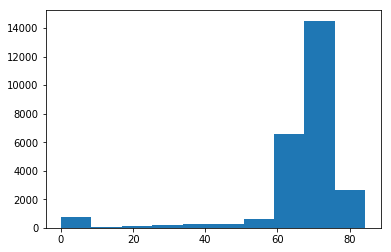

In [323]:
plt.hist(team_rating_df2['avg_player_rating'])

In [328]:
team_rating_df3 = team_rating_df2.loc[~(team_rating_df2['avg_player_rating'] < 50)]
team_rating_df3

,id,match_api_id,home_team_api_id,Hometeam_rating,Awayteam_rating,league,avg_player_rating
144,145,493016,9996,35.171406,71.482269,Belgium Jupiler League,53.326838
145,146,493017,8203,63.883844,67.678514,Belgium Jupiler League,65.781179
146,147,493018,9986,48.900859,63.151309,Belgium Jupiler League,56.026084
147,148,493019,9985,65.326353,65.268725,Belgium Jupiler League,65.297539
148,149,493020,9994,60.010739,62.531901,Belgium Jupiler League,61.271320
149,150,493021,8342,69.923077,56.744517,Belgium Jupiler League,63.333797
150,151,493022,9993,61.069522,58.592707,Belgium Jupiler League,59.831114
151,152,493023,7947,56.753463,49.646813,Belgium Jupiler League,53.200138
152,153,493024,10000,65.551683,58.813724,Belgium Jupiler League,62.182703
153,154,493025,9984,65.829883,69.923077,Belgium Jupiler League,67.876480


In [330]:
team_rating_df3

,id,match_api_id,home_team_api_id,Hometeam_rating,Awayteam_rating,league,avg_player_rating
144,145,493016,9996,35.171406,71.482269,Belgium Jupiler League,53.326838
145,146,493017,8203,63.883844,67.678514,Belgium Jupiler League,65.781179
146,147,493018,9986,48.900859,63.151309,Belgium Jupiler League,56.026084
147,148,493019,9985,65.326353,65.268725,Belgium Jupiler League,65.297539
148,149,493020,9994,60.010739,62.531901,Belgium Jupiler League,61.271320
149,150,493021,8342,69.923077,56.744517,Belgium Jupiler League,63.333797
150,151,493022,9993,61.069522,58.592707,Belgium Jupiler League,59.831114
151,152,493023,7947,56.753463,49.646813,Belgium Jupiler League,53.200138
152,153,493024,10000,65.551683,58.813724,Belgium Jupiler League,62.182703
153,154,493025,9984,65.829883,69.923077,Belgium Jupiler League,67.876480


(24360, 7)